In [1]:
import pandas as pd
df = pd.read_csv('bmi.csv')

In [2]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df.Gender = le.fit_transform(df.Gender)

In [6]:
df

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Index', axis ='columns'),df.Index)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()

In [10]:
model.fit(x_train, y_train)

C:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
model.predict(x_test)

array([4, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 2, 5, 4, 5, 4, 3, 4, 5, 2, 4, 1,
       4, 1, 2, 5, 5, 5, 4, 1, 5, 3, 2, 4, 3, 4, 5, 2, 4, 4, 5, 2, 0, 5,
       4, 5, 4, 4, 5, 4, 4, 4, 5, 3, 5, 5, 5, 5, 3, 5, 1, 3, 5, 4, 2, 5,
       3, 5, 3, 5, 4, 2, 5, 5, 3, 2, 5, 5, 5, 5, 5, 4, 4, 3, 5, 2, 5, 5,
       3, 3, 3, 5, 4, 2, 5, 2, 5, 4, 4, 5, 4, 2, 0, 4, 5, 5, 5, 4, 2, 5,
       5, 4, 2, 3, 2, 2, 4, 4, 4, 3, 5, 2, 2, 3, 1], dtype=int64)

In [12]:
y_pred = model.predict(x_test)

In [13]:
df2 = pd.DataFrame({'orig': y_test, 'pred': y_pred})
df2.to_csv('bmi1.csv')

In [14]:
from sklearn.metrics import mean_absolute_error as mae
mae_error = mae(y_test, y_pred)

In [15]:
model.predict([[0,155,39]])

C:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [16]:
Gender = int(input('enter your gender, 1 for Male , 0 for Female'))
Height =int(input('in cm'))
Weight =int(input('in kg'))

res = model.predict([[Gender, Height, Weight]])

if( res == 1) : print('underweight,suggestion: eat more')
elif(res == 2): print('healthy')
elif(res == 3): print('overweight')
elif(res == 4): print('obese')
else:print('not available')

enter your gender, 1 for Male , 0 for Female 0
in cm 166
in kg 56


healthy


C:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [17]:
df

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [18]:
from sklearn import tree
deci = tree.DecisionTreeClassifier()

In [19]:
deci

DecisionTreeClassifier()

In [20]:
deci.fit(df.drop('Index', axis='columns'),df.Index)

DecisionTreeClassifier()

In [21]:
deci.predict([[1,178,76]])

C:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

In [22]:
import matplotlib.pyplot as plt

In [23]:
text = tree.export_text(deci)

In [24]:
text

'|--- feature_2 <= 122.50\n|   |--- feature_2 <= 83.50\n|   |   |--- feature_1 <= 167.50\n|   |   |   |--- feature_2 <= 65.00\n|   |   |   |   |--- feature_1 <= 152.00\n|   |   |   |   |   |--- feature_2 <= 57.50\n|   |   |   |   |   |   |--- feature_0 <= 0.50\n|   |   |   |   |   |   |   |--- class: 2\n|   |   |   |   |   |   |--- feature_0 >  0.50\n|   |   |   |   |   |   |   |--- class: 3\n|   |   |   |   |   |--- feature_2 >  57.50\n|   |   |   |   |   |   |--- class: 3\n|   |   |   |   |--- feature_1 >  152.00\n|   |   |   |   |   |--- feature_1 <= 162.50\n|   |   |   |   |   |   |--- class: 2\n|   |   |   |   |   |--- feature_1 >  162.50\n|   |   |   |   |   |   |--- feature_2 <= 57.50\n|   |   |   |   |   |   |   |--- feature_1 <= 164.00\n|   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |--- feature_1 >  164.00\n|   |   |   |   |   |   |   |   |--- class: 2\n|   |   |   |   |   |   |--- feature_2 >  57.50\n|   |   |   |   |   |   |   |--- class: 2\n|   

[Text(0.698470744680851, 0.9583333333333334, 'x[2] <= 122.5\ngini = 0.735\nsamples = 500\nvalue = [13, 22, 69, 68, 130, 198]'),
 Text(0.4714095744680851, 0.875, 'x[2] <= 83.5\ngini = 0.786\nsamples = 324\nvalue = [13, 22, 69, 68, 97, 55]'),
 Text(0.5849401595744681, 0.9166666666666667, 'True  '),
 Text(0.27925531914893614, 0.7916666666666666, 'x[1] <= 167.5\ngini = 0.739\nsamples = 149\nvalue = [13, 22, 63, 27, 21, 3]'),
 Text(0.13829787234042554, 0.7083333333333334, 'x[2] <= 65.0\ngini = 0.699\nsamples = 72\nvalue = [1, 0, 25, 22, 21, 3]'),
 Text(0.05319148936170213, 0.625, 'x[1] <= 152.0\ngini = 0.398\nsamples = 31\nvalue = [1, 0, 23, 7, 0, 0]'),
 Text(0.031914893617021274, 0.5416666666666666, 'x[2] <= 57.5\ngini = 0.42\nsamples = 10\nvalue = [0, 0, 3, 7, 0, 0]'),
 Text(0.02127659574468085, 0.4583333333333333, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 1, 0, 0]'),
 Text(0.010638297872340425, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.031914

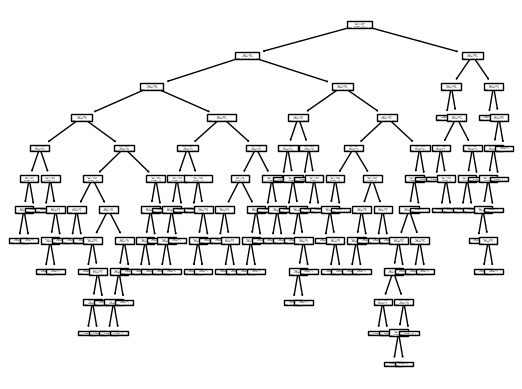

In [25]:
# fig = plt.figure(figsize=(20,20))
tree.plot_tree(deci)

In [26]:
fig = plt.figure(figsize=(150,150))
tree.plot_tree(deci,filled=True)
fig.savefig('tree.png')

In [27]:
import graphviz

In [30]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [31]:
data = tree.export_graphviz(deci,out_file=None,filled=True)
graph= graphviz.Source(data,format='png')
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [32]:
graph.render('tree_g.png')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
from dtreeviz.trees